In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("../CNN_poc"))

['.ipynb_checkpoints', 'CNN.ipynb', 'sample_submission.csv', 'test.csv', 'train.csv']


In [11]:
train=pd.read_csv("../CNN_poc/train.csv/train.csv")

In [14]:
print(train.shape)

(42000, 785)


In [15]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
test= pd.read_csv("../CNN_poc/test.csv/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

In [25]:
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

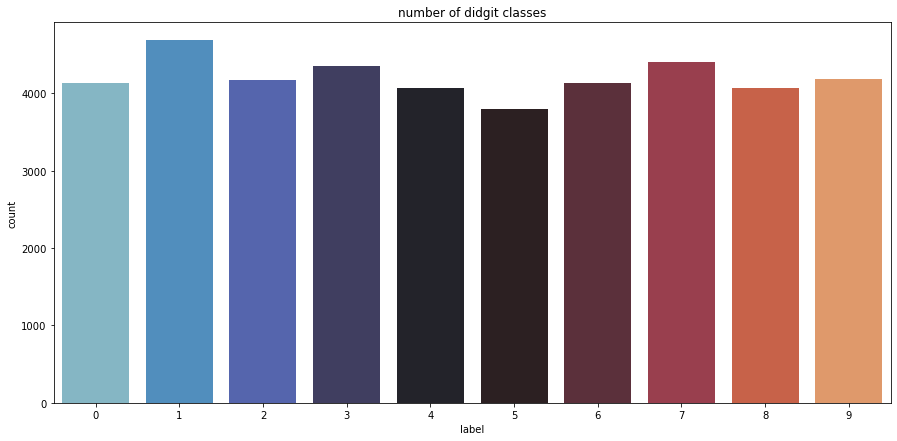

In [30]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g=sns.countplot(Y_train,palette="icefire")
plt.title("number of didgit classes")
Y_train.value_counts()


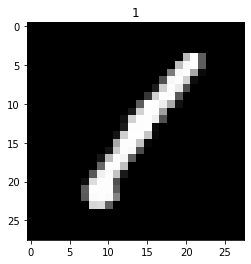

In [40]:
# plot some samples
X_train
img = X_train.iloc[0].to_numpy()
img=img.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
#plt.axis("off")
plt.show()

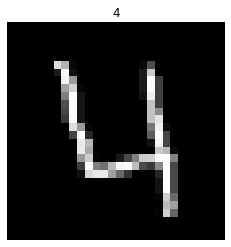

In [43]:
# plot some samples
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

Normalization, Reshape and Label Encoding
Normalization
We perform a grayscale normalization to reduce the effect of illumination's differences.
If we perform normalization, CNN works faster.
Reshape
Train and test images (28 x 28)
We reshape all data to 28x28x1 3D matrices.
Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.
Label Encoding
Encode labels to one hot vectors
2 => [0,0,1,0,0,0,0,0,0,0]
4 => [0,0,0,0,1,0,0,0,0,0]

In [46]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [53]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800,)
y_test shape (4200,)


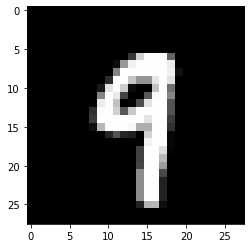

In [54]:
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial/notebook

mplementing with Keras

Create Model
conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)
Dropout: Dropout is a technique where randomly selected neurons are ignored during training

In [55]:
# 
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

AttributeError: module 'tensorflow.core.framework.types_pb2' has no attribute '_SPECIALIZEDTYPE'